<h1>Neuronale Netze</h1>

<h4>Imports</h4>

In [0]:
!pip install tensorflow

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving articles.csv to articles (1).csv


In [0]:
corpus = pd.read_csv('articles.csv', sep=';', header=None, error_bad_lines=False, warn_bad_lines=False, names=["category","text"])

In [0]:
corpus.head()

,category,text
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ..."
1,Etat,App sei nicht so angenommen worden wie geplant...
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,..."
3,Etat,Mitarbeiter überreichten Eigentümervertretern ...
4,Etat,Service: Jobwechsel in der Kommunikationsbranc...


 <h4>Vektorisierung</h4>

In [0]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(corpus["text"])
labels = LabelEncoder().fit_transform(corpus["category"])
vocab = vectorizer.vocabulary_

In [0]:
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.4, 
                                                    train_size=0.6,
                                                    random_state=42)

In [0]:
X_val = X_test[:1200]
X_test = X_test[1200:]

y_val = y_test[:1200]
y_test = y_test[1200:]

<h4>One Hot Encoding</h4>

In [0]:
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

<h3>Neuronales Netz</h3>

In [0]:
model = models.Sequential()
# Input Layer
model.add(layers.Dense(64, activation="relu", input_shape=(len(vocab),)))
# Hidden Layer
model.add(layers.Dense(64, activation="relu"))
# Output Layer
model.add(layers.Dense(len(np.unique(labels)), activation="softmax"))


model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])             #Keras bietet keinen F1-Score mehr an 

In [0]:
history = model.fit(X_train,
                   y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(X_test, y_test),
                   verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6163 samples, validate on 2910 samples
Epoch 1/10





6163/6163 [==============================] - 25s 4ms/step - loss: 1.7019 - acc: 0.5285 - val_loss: 1.2066 - val_acc: 0.6893
Epoch 2/10
6163/6163 [==============================] - 24s 4ms/step - loss: 0.7354 - acc: 0.8433 - val_loss: 0.6869 - val_acc: 0.8247
Epoch 3/10
6163/6163 [==============================] - 24s 4ms/step - loss: 0.2679 - acc: 0.9589 - val_loss: 0.5093 - val_acc: 0.8512
Epoch 4/10
6163/6163 [==============================] - 24s 4ms/step - loss: 0.0880 - acc: 0.9886 - val_loss: 0.4742 - val_acc: 0.8495
Epoch 5/10
6163/6163 [==============================] - 24s 4ms/step - loss: 0.0297 - acc: 0.9956 - val_loss: 0.4495 - val_acc: 0.8601
Epoch 6/10
6163/6163 [==============================] - 24s 4ms/step - loss: 0.0121 - acc: 0.9977 - val_loss: 0.4658 - val_acc: 0.8560
Epoch 7/10
6163/6163 [==================

<h4>Visualisierung der Ergebnisse</h4>

In [0]:
def plot_results(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "ro", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    plt.clf() #clears the figure

    acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    plt.plot(epochs, acc, "b", label="Training acc")
    plt.plot(epochs, val_acc, "ro", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()

    plt.show()

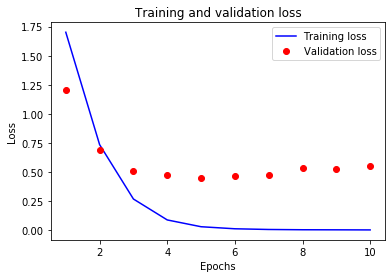

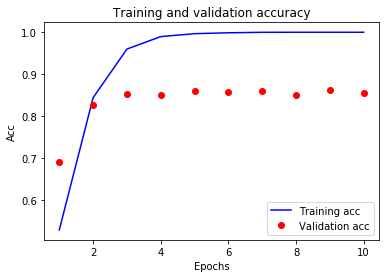

In [0]:
plot_results(history)

--> Overfitting

<h3>Evaluation</h3>

In [0]:
from sklearn.metrics import f1_score

<h4>Alle Scores</h4>

Evaluationsfunktion

In [0]:
def evaluation():
    y_pred = model.predict(X_test)
    f1_keras = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average="micro")
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"\nResults:")
    print(f"Train_acc: {np.around(np.mean(history.history['acc']), decimals=3)}")
    print(f"Val_acc: {np.around(np.mean(history.history['val_acc']), decimals=3)}")
    print(f"Test_acc: {np.around(test_acc, decimals=3)}") 
    print(f"F1-score: {str(np.around(f1_keras, decimals=3))}")

In [0]:
evaluation()

2910/2910 [==============================] - 2s 734us/step

Results:
Train_acc: 0.824
Val_acc: 0.739
Test_acc: 0.835
F1-score: 0.835


<br>
<h3>Hyperparameteroptimierung</h3>

In [0]:
!pip install hyperas
!pip install hyperopt

In [0]:
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Dropout
from keras.layers.core import Dense, Dropout, Activation
from keras import backend as K

from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from hyperas.distributions import uniform
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Zusammenfassung der Initialisierungsschritte in einer Funktion data():

In [0]:
def data():
    
    corpus = pd.read_csv('articles.csv', sep=';', header=None, error_bad_lines=False, warn_bad_lines=False, names=["category","text"])

    vectorizer = TfidfVectorizer()
    vector = vectorizer.fit_transform(corpus["text"])
    labels = LabelEncoder().fit_transform(corpus["category"])
    vocab = vectorizer.vocabulary_

    X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                            labels, 
                                                            test_size=0.4, 
                                                            train_size=0.6,
                                                            random_state=42)
    X_val = X_test[:1200]
    X_test = X_test[1200:]

    y_val = y_test[:1200]
    y_test = y_test[1200:]

    y_val = to_categorical(y_val)
    y_test = to_categorical(y_test)
    y_train = to_categorical(y_train)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

Erstellung der Neuronalen Netzes als Funktion:

In [0]:
def create_model(X_train, y_train, X_val, y_val, X_test, y_test, vocab, labels):
    
    model = models.Sequential()
    model.add(Dense({{choice([16, 32, 64])}}, input_shape=(len(vocab),)))
    model.add(Activation('relu'))
    model.add(Dropout({{choice([0.2, 0.3])}}))
    model.add(Dense({{choice([16, 32, 64])}}))
    model.add(Activation('relu'))
    model.add(Dropout({{choice([0.2, 0.3])}})) 
    model.add(Dense(len(np.unique(labels))))
    model.add(Activation('softmax'))

    model.compile(optimizer='rmsprop',
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    
    history = model.fit(X_train,
                        y_train,
                        epochs=10,
                        batch_size=16,
                        validation_data=(X_val, y_val),
                        verbose=2)
              
    score = model.evaluate(X_test, y_test, verbose=0)
    validation_acc = np.mean(history.history['val_acc']) 
    if K.backend() == 'tensorflow':
        K.clear_session()
    
    out={'loss': -validation_acc, 'status':STATUS_OK, 'model': model}
    return out

<h4>Optimierung</h4>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%ls /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
'My Drive'/


In [0]:
import os

In [0]:
%%time
from keras.layers.core import Dense
best_run, best_model = optim.minimize(model=create_model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                      notebook_name=os.path.join('..','gdrive','My Drive','Colab Notebooks','7 Neuronale Netze unbalanciertes Korpus'))

>>> Imports:
#coding=utf-8

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    from keras import models
except:
    pass

try:
    from keras import layers
except:
    pass

try:
    from keras.utils.np_utils import to_categorical
except:
    pass

try:
    from sklearn.feature_extraction.text import TfidfVectorizer
except:
    pass

try:
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from google.colab import files
except:
    pass

try:
    from sklearn.metrics import f1_score
except:
    pass

try:
    from keras import regularizers
except:
    pass

try:
    from keras import regularizers
except:
    pass

try:
    from keras.layers import Dropou

In [0]:
_train, y_train, X_val, y_val, X_test, y_test = data()
#print("Evalutation of best performing model:" )
#print(best_model.evaluate(X_test, y_test))                  #gibt Fehlermeldung: Invalid Argument Error, bisher keine Lösung gefunden
print("Best performing model chosen hyper-parameters:")
print(best_run)

Best performing model chosen hyper-parameters:
{'Dense': 2, 'Dense_1': 2, 'Dropout': 0, 'Dropout_1': 1}


Zur Erinnerung das Modell (definiert in der Funktion create_model): <br><br>
model = models.Sequential()<br>
    model.add(Dense({{choice([16, 32, 64])}}, input_shape=(len(vocab),)))  --> <b>64</b><br>
    model.add(Activation('relu'))<br>
    model.add(Dropout({{choice([0.2, 0.3])}}))  --> <b>0.2</b><br>
    model.add(Dense({{choice([16, 32, 64])}}))  --> <b>64</b><br>
    model.add(Activation('relu'))<br>
    model.add(Dropout({{choice([0.2, 0.3])}}))  --> <b>0.3</b><br>
    model.add(Dense(len(np.unique(labels))))<br>
    model.add(Activation('softmax'))<br>

<h4>Test</h4>

In [0]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape=(len(vocab),))) 
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(layers.Dense(len(np.unique(labels)), activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                   y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(X_test, y_test),
                   verbose=1)

Train on 6163 samples, validate on 2910 samples
Epoch 1/10
6163/6163 [==============================] - 8s 1ms/step - loss: 2.0120 - acc: 0.3398 - val_loss: 1.7645 - val_acc: 0.5412
Epoch 2/10
6163/6163 [==============================] - 8s 1ms/step - loss: 1.5037 - acc: 0.5668 - val_loss: 1.2739 - val_acc: 0.6739
Epoch 3/10
6163/6163 [==============================] - 8s 1ms/step - loss: 1.0494 - acc: 0.6870 - val_loss: 0.9318 - val_acc: 0.7282
Epoch 4/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.7138 - acc: 0.8067 - val_loss: 0.7282 - val_acc: 0.8151
Epoch 5/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.4768 - acc: 0.8880 - val_loss: 0.6063 - val_acc: 0.8361
Epoch 6/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.3276 - acc: 0.9247 - val_loss: 0.5482 - val_acc: 0.8419
Epoch 7/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.2281 - acc: 0.9507 - val_loss: 0.5110 - val_acc: 0.8488
Epoch 8/10
616

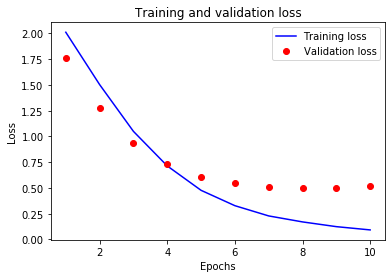

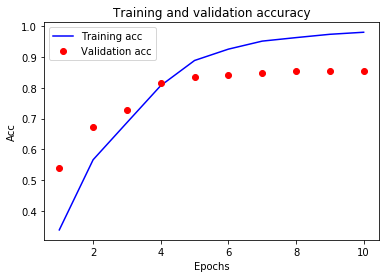

2910/2910 [==============================] - 2s 781us/step

Results:
Train_acc: 0.808
Val_acc: 0.785
Test_acc: 0.853
F1-score: 0.853


In [0]:
plot_results(history)
evaluation()

<h4>2. Versuch</h4>

In [0]:
def create_model2(X_train, y_train, X_val, y_val, X_test, y_test, vocab, labels):
    
    model = models.Sequential()
    model.add(Dense({{choice([32, 64, 128])}}, input_shape=(len(vocab),)))
    model.add(Activation('relu'))
    model.add(Dropout({{choice([0.1, 0.2, 0.3, 0.4, 0.5])}}))
    model.add(Dense({{choice([32, 64, 128])}}))
    model.add(Activation('relu'))
    model.add(Dropout({{choice([0.1, 0.2, 0.3, 0.4, 0.5])}})) 
    model.add(Dense(len(np.unique(labels))))
    model.add(Activation('softmax'))

    model.compile(optimizer='rmsprop',
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    
    history = model.fit(X_train,
                        y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        verbose=2)
              
    score = model.evaluate(X_test, y_test, verbose=0)
    validation_acc = np.mean(history.history['val_acc']) 
    if K.backend() == 'tensorflow':
        K.clear_session()
    
    out={'loss': -validation_acc, 'status':STATUS_OK, 'model': model}
    return out

In [0]:
%%time
from keras.layers.core import Dense
best_run2, best_model2 = optim.minimize(model=create_model2,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                      notebook_name=os.path.join('..','gdrive','My Drive','Colab Notebooks','7 Neuronale Netze unbalanciertes Korpus'))

>>> Imports:
#coding=utf-8

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    from keras import models
except:
    pass

try:
    from keras import layers
except:
    pass

try:
    from keras.utils.np_utils import to_categorical
except:
    pass

try:
    from sklearn.feature_extraction.text import TfidfVectorizer
except:
    pass

try:
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from google.colab import files
except:
    pass

try:
    from sklearn.metrics import f1_score
except:
    pass

try:
    from keras import regularizers
except:
    pass

try:
    from keras import regularizers
except:
    pass

try:
    from keras.layers import Dropou

In [0]:
_train, y_train, X_val, y_val, X_test, y_test = data()
print("Best performing model chosen hyper-parameters:")
print(best_run2)

Best performing model chosen hyper-parameters:
{'Dense': 1, 'Dense_1': 2, 'Dropout': 0, 'Dropout_1': 1}


<h4>Test</h4>

In [0]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape=(len(vocab),))) 
model.add(Dropout(0.1))
model.add(layers.Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(layers.Dense(len(np.unique(labels)), activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                   y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(X_test, y_test),
                   verbose=1)

Train on 6163 samples, validate on 2910 samples
Epoch 1/10
6163/6163 [==============================] - 8s 1ms/step - loss: 1.6819 - acc: 0.5376 - val_loss: 1.1596 - val_acc: 0.6821
Epoch 2/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.7217 - acc: 0.8166 - val_loss: 0.6483 - val_acc: 0.8351
Epoch 3/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.2622 - acc: 0.9503 - val_loss: 0.4911 - val_acc: 0.8536
Epoch 4/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0887 - acc: 0.9851 - val_loss: 0.4509 - val_acc: 0.8605
Epoch 5/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0322 - acc: 0.9938 - val_loss: 0.4445 - val_acc: 0.8653
Epoch 6/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0148 - acc: 0.9969 - val_loss: 0.4631 - val_acc: 0.8691
Epoch 7/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0077 - acc: 0.9982 - val_loss: 0.4886 - val_acc: 0.8667
Epoch 8/10
616

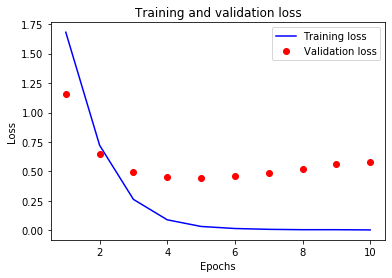

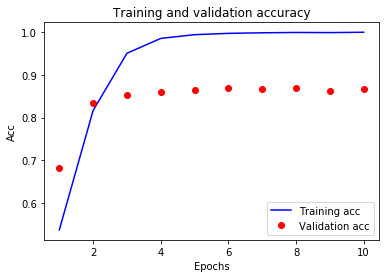

2910/2910 [==============================] - 2s 740us/step

Results:
Train_acc: 0.928
Val_acc: 0.843
Test_acc: 0.867
F1-score: 0.867


In [0]:
plot_results(history)
evaluation()

<h4>3. Versuch</h4>

In [0]:
def create_model3(X_train, y_train, X_val, y_val, X_test, y_test, vocab, labels):
    
    model = models.Sequential()
    model.add(layers.Dense(64, input_shape=(len(vocab),)))
    model.add(Activation('relu'))
    model.add(Dropout({{choice([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15])}}))
    model.add(layers.Dense(128, input_shape=(len(vocab),)))
    model.add(Activation('relu'))
    model.add(Dropout({{choice([0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25])}})) 
    model.add(Dense(len(np.unique(labels))))
    model.add(Activation('softmax'))

    model.compile(optimizer='rmsprop',
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    
    history = model.fit(X_train,
                        y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        verbose=2)
              
    score = model.evaluate(X_test, y_test, verbose=0)
    validation_acc = np.mean(history.history['val_acc']) 
    if K.backend() == 'tensorflow':
        K.clear_session()
    
    out={'loss': -validation_acc, 'status':STATUS_OK, 'model': model}
    return out

In [0]:
%%time
from keras.layers.core import Dense
best_run3, best_model3 = optim.minimize(model=create_model3,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                      notebook_name=os.path.join('..','gdrive','My Drive','Colab Notebooks','7 Neuronale Netze unbalanciertes Korpus'))

>>> Imports:
#coding=utf-8

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    from keras import models
except:
    pass

try:
    from keras import layers
except:
    pass

try:
    from keras.utils.np_utils import to_categorical
except:
    pass

try:
    from sklearn.feature_extraction.text import TfidfVectorizer
except:
    pass

try:
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from google.colab import files
except:
    pass

try:
    from sklearn.metrics import f1_score
except:
    pass

try:
    from keras import regularizers
except:
    pass

try:
    from keras import regularizers
except:
    pass

try:
    from keras.layers import Dropou

In [0]:
_train, y_train, X_val, y_val, X_test, y_test = data()
print("Best performing model chosen hyper-parameters:")
print(best_run3)

Best performing model chosen hyper-parameters:
{'Dropout': 1, 'Dropout_1': 6}


<h4>Test</h4>

In [0]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape=(len(vocab),))) 
model.add(Dropout(0.02))
model.add(layers.Dense(128, activation="relu"))
model.add(Dropout(0.22))
model.add(layers.Dense(len(np.unique(labels)), activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                   y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(X_test, y_test),
                   verbose=1)

Train on 6163 samples, validate on 2910 samples
Epoch 1/10
6163/6163 [==============================] - 9s 1ms/step - loss: 1.6818 - acc: 0.5001 - val_loss: 1.1789 - val_acc: 0.6880
Epoch 2/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.7194 - acc: 0.8423 - val_loss: 0.6632 - val_acc: 0.8192
Epoch 3/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.2620 - acc: 0.9544 - val_loss: 0.4819 - val_acc: 0.8526
Epoch 4/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0827 - acc: 0.9862 - val_loss: 0.4437 - val_acc: 0.8598
Epoch 5/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0273 - acc: 0.9955 - val_loss: 0.4385 - val_acc: 0.8639
Epoch 6/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0101 - acc: 0.9977 - val_loss: 0.4992 - val_acc: 0.8512
Epoch 7/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0051 - acc: 0.9987 - val_loss: 0.4825 - val_acc: 0.8619
Epoch 8/10
616

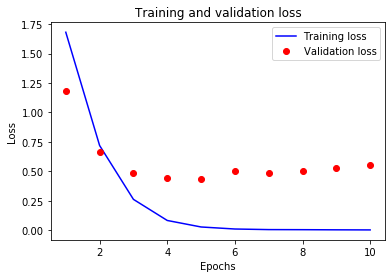

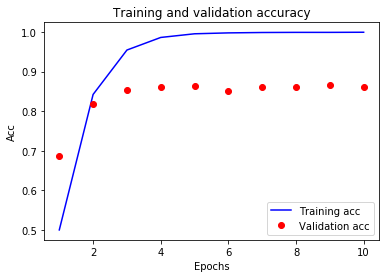

2910/2910 [==============================] - 2s 739us/step

Results:
Train_acc: 0.927
Val_acc: 0.838
Test_acc: 0.862
F1-score: 0.862


In [0]:
plot_results(history)
evaluation()

<h3>Finales Modell</h3>

In [0]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape=(len(vocab),))) 
model.add(Dropout(0.1)) 
model.add(layers.Dense(128, activation="relu"))
model.add(Dropout(0.2)) 
model.add(layers.Dense(len(np.unique(labels)), activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                   y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(X_test, y_test),
                   verbose=1)

Train on 6163 samples, validate on 2910 samples
Epoch 1/10
6163/6163 [==============================] - 8s 1ms/step - loss: 1.7056 - acc: 0.5092 - val_loss: 1.1639 - val_acc: 0.6942
Epoch 2/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.7320 - acc: 0.8092 - val_loss: 0.6551 - val_acc: 0.8107
Epoch 3/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.2889 - acc: 0.9403 - val_loss: 0.4930 - val_acc: 0.8550
Epoch 4/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.1038 - acc: 0.9823 - val_loss: 0.4480 - val_acc: 0.8605
Epoch 5/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0358 - acc: 0.9935 - val_loss: 0.4391 - val_acc: 0.8653
Epoch 6/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0146 - acc: 0.9972 - val_loss: 0.4669 - val_acc: 0.8653
Epoch 7/10
6163/6163 [==============================] - 8s 1ms/step - loss: 0.0077 - acc: 0.9982 - val_loss: 0.4997 - val_acc: 0.8632
Epoch 8/10
616

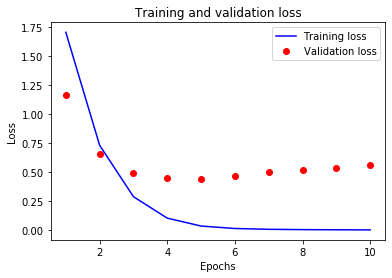

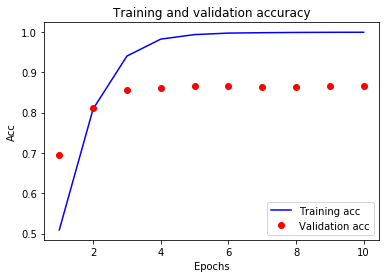

2910/2910 [==============================] - 2s 732us/step

Results:
Train_acc: 0.923
Val_acc: 0.841
Test_acc: 0.867
F1-score: 0.867


In [0]:
plot_results(history)
evaluation()